In [284]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from importlib import reload
import mathutils
import fitsio
import setcover
import archespec
import scipy.optimize as op
from scipy.ndimage import gaussian_filter1d
import cookb_signalsmooth
from matplotlib.colors import LogNorm

In [322]:
plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.major.size'] = 15
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['ytick.labelsize'] = 25

In [330]:
masterwave, allflux, allivar = archespec.rest_allspec_readin()
objs_ori = archespec.arche_readin()
nobj = objs_ori.size
z = objs_ori['Z']
mass = objs_ori['MASS']
sfr = objs_ori['SFR']

Reading /Users/Benjamin/AstroData/AllInOne/AIO_Archetype_SDSSRestFrame_Wave03600_07200A.fits.


In [331]:
index_wave_all = np.searchsorted(masterwave, [3605., 6997.])
tmpflux = allflux[index_wave_all[0]:index_wave_all[1],:]
tmpivar = allivar[index_wave_all[0]:index_wave_all[1],:]
tmpwave = masterwave[index_wave_all[0]:index_wave_all[1]]
tmploglam = np.log10(tmpwave)
print(tmploglam.size, tmploglam.size//15*15)

2880 2880


In [332]:
itmp = (np.where(np.logical_and(np.logical_and(\
                np.logical_and(np.logical_and(mass>8, mass<12), sfr>1e-4),\
                                               z<0.3), z>0.05)))[0]
iuse = np.random.choice(itmp, 1000)
print(iuse.shape)
chi2 = np.zeros((iuse.size, iuse.size))
A = np.zeros((iuse.size, iuse.size))

(1000,)


In [333]:
newwave = np.median(tmpwave.reshape(tmploglam.size//15, 15), axis=1)
newflux = np.sum(tmpflux.reshape(tmploglam.size//15, 15, tmpflux.shape[1]), axis=1)
newivar = 1./np.sum(1./tmpivar.reshape(tmploglam.size//15, 15, tmpflux.shape[1]), axis=1)

In [334]:
tmp_yerr = 1./np.sqrt(newivar[:, iuse].T.reshape(iuse.size, newwave.size))
tmp_y = newflux[:,iuse].T
for i in np.arange(iuse.size):
    tmp_x = newflux[:, iuse[i]].T.reshape(1,newwave.size)
    tmp_xerr = 1./np.sqrt(newivar[:, iuse[i]].T.reshape(1,newwave.size))
    A_tmp, chi2_tmp = mathutils.quick_amplitude(tmp_x, tmp_y, tmp_xerr, tmp_yerr)
    A[i,:] = A_tmp
    chi2[i,:] = chi2_tmp

In [399]:
a_matrix = chi2/newwave.size<3.5
cost = np.ones(iuse.size)

(array([  72728.,  146849.,  102724.,   77779.,   62682.,   51284.,
          43149.,   36863.,   32013.,   27911.,   25116.,   22796.,
          20850.,   18342.,   16878.,   14817.,   13222.,   12236.,
          11075.,   10001.,    9585.,    8845.,    8311.,    7988.,
           7555.,    6897.,    6530.,    5966.,    5628.,    5041.,
           4930.,    4604.,    4236.,    4054.,    3877.,    3544.,
           3531.,    3273.,    2869.,    2819.]),
 array([   0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,
          20. ,   22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,
          40. ,   42.5,   45. ,   47.5,   50. ,   52.5,   55. ,   57.5,
          60. ,   62.5,   65. ,   67.5,   70. ,   72.5,   75. ,   77.5,
          80. ,   82.5,   85. ,   87.5,   90. ,   92.5,   95. ,   97.5,
         100. ]),
 <a list of 40 Patch objects>)

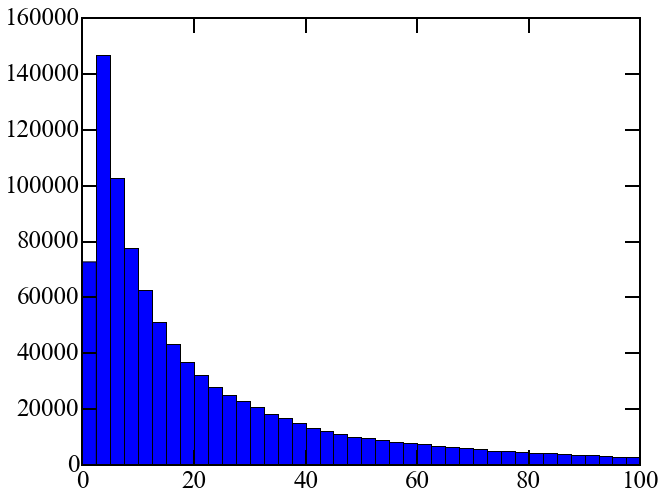

In [374]:
plt.hist(np.ravel(chi2/newwave.size), 40, range=[0,100])

In [400]:
g = setcover.SetCover(a_matrix, cost)

In [401]:
g.CFT()

Best solution: UB=53.0, LB=26.628683150741022, UB1=53.0, LB1=26.628683150741022
53.0
UB=53.0, UB1=53.0, LB=26.628683150741022, change=49.75720160237543%
Best solution: UB=53.0, LB=26.93882239802563, UB1=53.0, LB1=26.93882239802563
53.0
UB=53.0, UB1=53.0, LB=26.93882239802563, change=49.1720332112724%
Best solution: UB=53.0, LB=26.977690031469717, UB1=53.0, LB1=26.977690031469717
53.0
UB=53.0, UB1=53.0, LB=26.977690031469717, change=49.098698053830724%
Best solution: UB=53.0, LB=26.862949684406345, UB1=53.0, LB1=26.862949684406345
53.0
UB=53.0, UB1=53.0, LB=26.862949684406345, change=49.315189274705006%
Best solution: UB=53.0, LB=26.99549832996678, UB1=53.0, LB1=26.99549832996678
53.0
UB=53.0, UB1=53.0, LB=26.99549832996678, change=49.065097490628716%
Best solution: UB=53.0, LB=26.952142591279028, UB1=53.0, LB1=26.952142591279028
53.0
UB=53.0, UB1=53.0, LB=26.952142591279028, change=49.146900771171644%
Best solution: UB=53.0, LB=27.06359134137065, UB1=53.0, LB1=27.06359134137065
53.0
UB

/Users/Benjamin/Code/BGT-Cosmology/Spectroscopy/archetype/setcover.py:391: UserWarning: Iteration reaches maximum = 10
  warnings.warn("Iteration reaches maximum = {0}".format(niters))


In [402]:
iarchetype = np.nonzero(g.s)[0]
print(iarchetype.shape)
tmpmedian = tmpflux[:,iuse[iarchetype]]

(53,)


In [403]:
# Calculate [O II] EW
wave_oii = 3728.
index_oii = np.searchsorted(tmpwave, wave_oii)
flux_oii = np.sum(tmpmedian[index_oii-5:index_oii+5,:], axis=0)
flux_left = np.sum(tmpmedian[index_oii-15:index_oii-5,:], axis=0)
flux_right = np.sum(tmpmedian[index_oii+5:index_oii+15,:], axis=0)
ew_oii = flux_oii/(flux_left+flux_right)*2.
isort_oii = np.argsort(ew_oii)[::-1]

wave_ha = 6563.
index_ha = np.searchsorted(tmpwave, wave_ha)
flux_ha = np.sum(tmpmedian[index_ha-5:index_ha+5,:], axis=0)
flux_haleft = np.sum(tmpmedian[index_ha-115:index_ha-105,:], axis=0)
flux_haright = np.sum(tmpmedian[index_ha+105:index_ha+115,:], axis=0)
ew_ha = flux_ha/(flux_haleft+flux_haright)*2.
isort_ha = np.argsort(ew_ha)[::-1]

wave_norm = 4600.
index_norm = np.searchsorted(tmpwave, wave_norm)
flux_norm = np.median(tmpmedian[index_norm-5:index_norm+5,:], axis=0)


wave_left = 4200.
index_left = np.searchsorted(tmpwave, wave_left)
flux_left = np.sum(tmpmedian[index_left-15:index_left+15,:], axis=0)
wave_right = 5500.
index_right = np.searchsorted(tmpwave, wave_right)
flux_right = np.sum(tmpmedian[index_right-15:index_right+15,:], axis=0)
color_cont = flux_right/flux_left
isort_cont = np.argsort(color_cont)

142.26423645 53.9115142822
236.30909729 -2.20084547997
156.803726196 14.0255756378
162.139892578 62.0513916016
125.572250366 34.2123146057
225.71661377 27.2691669464
114.841117859 24.4210338593
141.073638916 40.7591819763
217.895767212 34.4965438843
57.15467453 -0.463413268328
250.549819946 30.4536857605
158.171875 4.7557349205
7.3348236084 -0.174693793058
178.508544922 61.6455535889
219.855789185 26.868303299
14.4889621735 -1.20526444912
199.213745117 5.94638586044
182.94291687 15.5670413971
343.27130127 14.0642137527
200.941665649 61.0667266846
7.26276779175 -11.0634279251
175.236984253 9.31462097168
214.513519287 50.6276931763
327.149475098 -8.65971946716
46.1898574829 -1.07081985474
313.06262207 -0.0192763637751
193.905502319 50.1758651733
188.447723389 42.5592575073
141.246383667 56.8237838745
225.912582397 37.6330451965
322.530853271 -0.0222727563232
337.355163574 -8.66835212708
145.723693848 28.2821826935
235.063873291 41.5458755493
157.437271118 52.8621482849
143.595413208 25.9

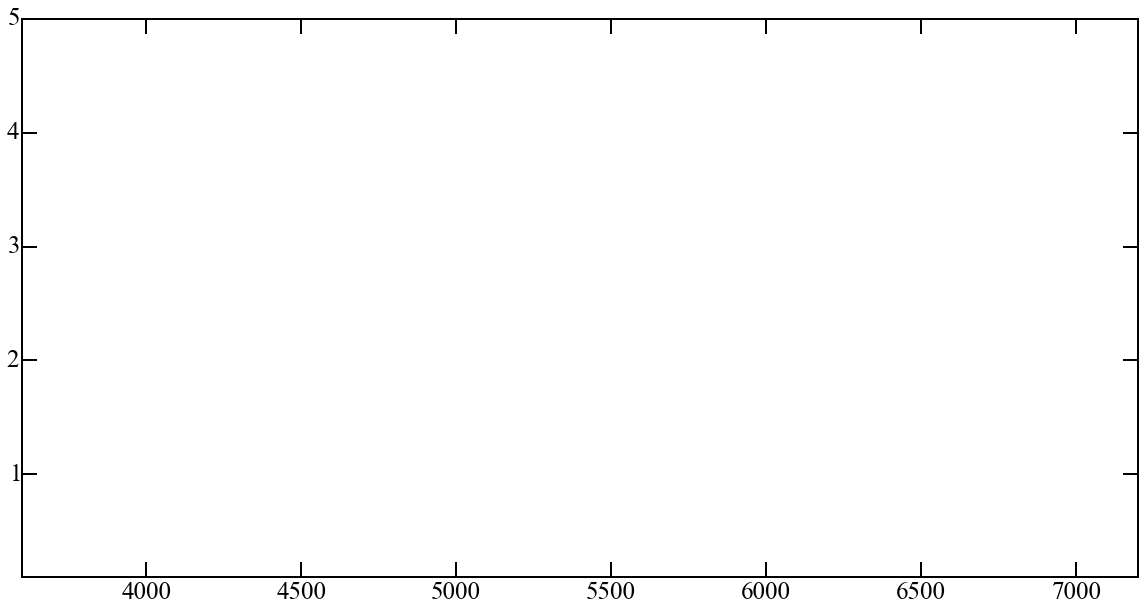

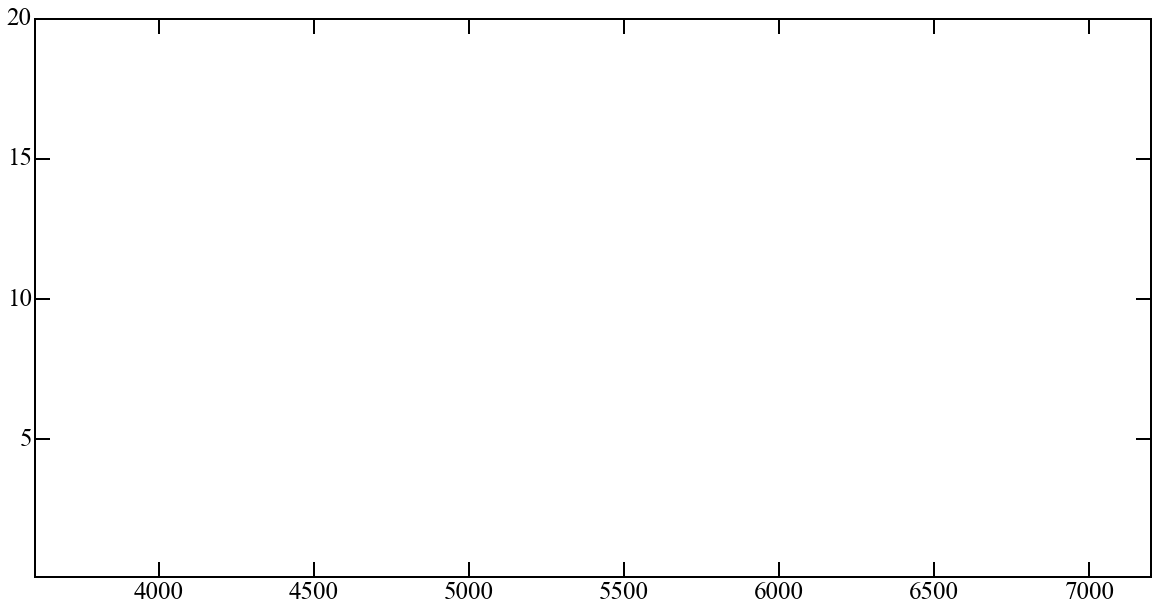

In [404]:
#i = -1
i += 1
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(111)

fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.add_subplot(111)
#x = gaussian_filter1d(tmpwave, 1.5)
x = tmpwave

for i in np.arange(iarchetype.size):
    #y = gaussian_filter1d(tmpmedian[:,isort_oii[i]]/flux_norm[isort_oii[i]], 1.5)
    #y = cookb_signalsmooth.smooth(tmpmedian[:,isort_oii[i]]/flux_norm[isort_oii[i]], 20)
    #iwave_use = np.where(tmpmedian[:,isort_cont[i]]>1.E-5)[0]
    iwave_use = np.where(tmpmedian[:,isort_ha[i]]>1.E-5)[0]
    y = cookb_signalsmooth.smooth(tmpmedian[iwave_use,isort_ha[i]]/flux_norm[isort_ha[i]], 10)
    #ax.plot(x, y)
    ax1.plot(x[iwave_use], y)
    ax2.loglog(x[iwave_use], y)
    ax1.set_xlim(3600, 7200)
    ax2.set_xlim(3600, 7200)
    ax1.set_xticks((np.arange(4)+1.)*1000.+3000.)
    ax2.set_xticks((np.arange(4)+1.)*1000.+3000.)
    ax1.set_ylim(1E-1, 5E0)
    ax2.set_ylim(1E-1, 2E1)
    filefile1 = "/Users/Benjamin/Dropbox/Zhu_Projects/Archetype/Movie/Full50_"+'%03d'%i+".jpg"
    filefile2 = "/Users/Benjamin/Dropbox/Zhu_Projects/Archetype/Movie/Loglog_Full50_"+'%03d'%i+".jpg"
    fig1.savefig(filefile1)
    fig2.savefig(filefile2)
    ax1.clear()
    ax2.clear()
    #print(objs_ori['RA'][iuse[iarchetype[isort_oii[i]]]], objs_ori['DEC'][iuse[iarchetype[isort_oii[i]]]])

    #print(objs_ori['RA'][iuse[iarchetype]])
for i in (np.arange(iarchetype.size))[::-1]:
    print(objs_ori['RA'][iuse[iarchetype[isort_ha[i]]]], objs_ori['DEC'][iuse[iarchetype[isort_ha[i]]]])

In [395]:
for i in (np.arange(iarchetype.size))[::-1]:
    print(objs_ori['RA'][iuse[iarchetype[isort_oii[i]]]], objs_ori['DEC'][iuse[iarchetype[isort_oii[i]]]])

162.139892578 62.0513916016
125.572250366 34.2123146057
125.761306763 44.367515564
193.905502319 50.1758651733
177.023406982 58.4851074219
215.381393433 41.4347991943
171.667907715 31.4753284454
219.855789185 26.868303299
175.236984253 9.31462097168
7.26276779175 -11.0634279251
217.895767212 34.4965438843
7.3348236084 -0.174693793058
200.941665649 61.0667266846
164.111785889 14.0536975861
182.94291687 15.5670413971
213.632522583 42.678237915
10.7179775238 0.458368003368
357.239807129 -0.98694986105
178.508544922 61.6455535889
143.595413208 25.9859008789
321.908660889 -0.260174512863
250.549819946 30.4536857605
158.171875 4.7557349205
327.149475098 -8.65971946716
199.213745117 5.94638586044
343.27130127 14.0642137527
157.437271118 52.8621482849
239.781112671 31.7444610596
214.513519287 50.6276931763
26.1768245697 0.0897940024734
201.000778198 7.49088859558
141.246383667 56.8237838745
322.530853271 -0.0222727563232
178.948547363 0.814446270466
154.457580566 10.5160036087
46.1898574829 -1

In [106]:
150./360.*24

10.0

In [107]:
print(isort_oii)

[ 9 37 42 26 27 41 11 17 33 28 15 40 19 31 24  7 12 29  5  2  8 16  4 21 23
 22 14 30 18  3 39 25 13  1 35 34 43 38 32 10  6  0 20 36]


In [221]:
a_school = np.zeros((11,11), dtype=bool)
cost_school = np.ones(11)

In [222]:
# 1
a_school[0:4, 0] = True
# 2
a_school[0:3, 1] = True
a_school[4, 1] = True
# 3
a_school[0:6, 2] = True
# 4
a_school[0, 3] = True
a_school[2:4, 3] = True
a_school[5:7, 3] = True
# 5
a_school[1:3, 4] = True
a_school[4:6, 4] = True
a_school[7:9, 4] = True
# 6
a_school[2:8, 5] = True
# 7
a_school[3, 6] = True
a_school[5:8, 6] = True
# 8
a_school[4:10, 7] = True
# 9
a_school[4, 8] = True
a_school[7:10, 8] = True
# 10
a_school[7:11, 9] = True
# 11
a_school[9:11, 10] = True

In [223]:
print(a_school*0.1)

[[ 0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0. ]
 [ 0.1  0.   0.1  0.1  0.   0.1  0.1  0.   0.   0.   0. ]
 [ 0.   0.1  0.1  0.   0.1  0.1  0.   0.1  0.1  0.   0. ]
 [ 0.   0.   0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.1  0.   0.1  0.1  0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.1  0.1  0.1  0.1  0.1  0.1  0. ]
 [ 0.   0.   0.   0.   0.1  0.   0.   0.1  0.1  0.1  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.1  0.1  0.1  0.1]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.1]]


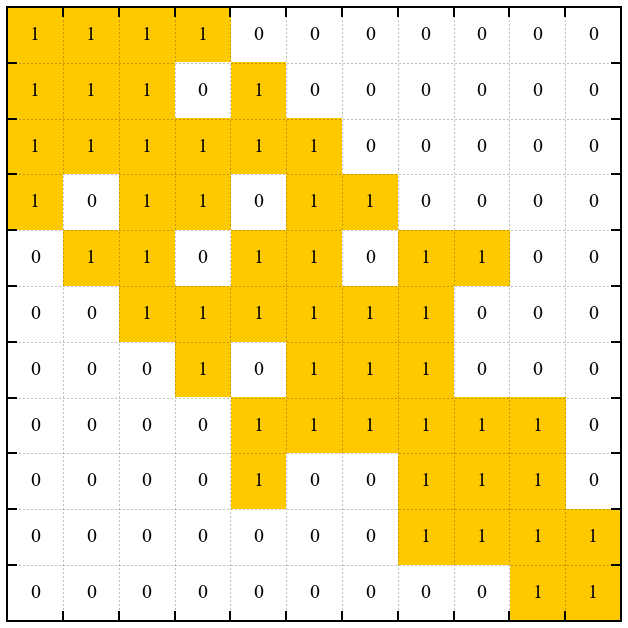

In [224]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
mat = ax.imshow(a_school, cmap='hot_r', interpolation='nearest', vmax=3., vmin=0)
#plt.yticks(np.arange(a_school.shape[0]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.xticks(np.arange(a_school.shape[1]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
plt.yticks(np.arange(a_school.shape[0]-1)+0.5, [])#+1)
plt.xticks(np.arange(a_school.shape[1]-1)+0.5, [])#+1)
#plt.xticks(rotation=30)
#plt.xlabel('Concert Dates')

# this places 0 or 1 centered in the individual squares
for x in np.arange(a_school.shape[0]):
    for y in np.arange(a_school.shape[1]):
        ax.annotate(str(a_school[x, y].astype(int))[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center', fontsize=20)
ax.grid(True)
#plt.show()

(2, -2)

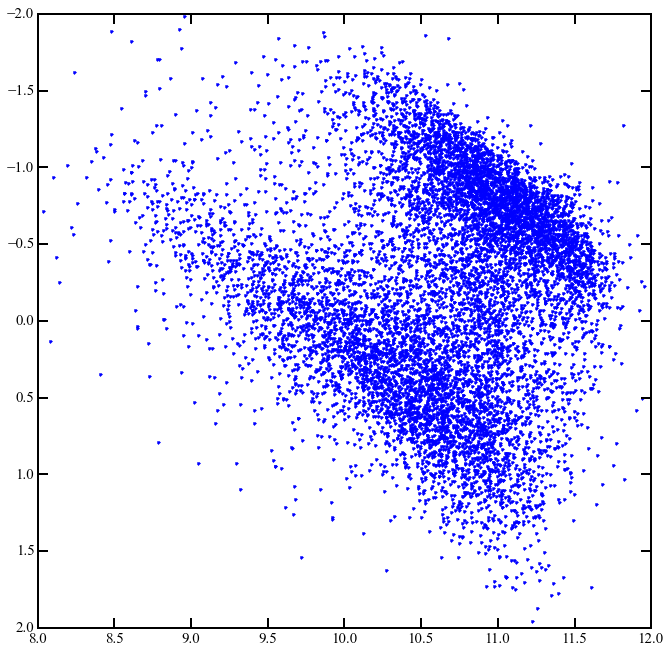

In [256]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
#ax.hist2d(dr7_mass['MEDIAN'][iarche], np.log10(dr7_sfr['MEDIAN'][iarche]), bins=160)
#ax.plot(dr7_mass['MEDIAN'][iarche], np.log10(dr7_sfr['MEDIAN'][iarche]), '.')
ax.plot(dr7_mass['MEDIAN'][iarche], dr7_sfr['MEDIAN'][iarche], '.')
ax.set_ylim(2, -2)

In [278]:
dr7_info = fitsio.read('/Users/Benjamin/AstroData/Garching/gal_info_dr7_v5_2.fit.gz', ext=1)
dr7_ssfr = fitsio.read('/Users/Benjamin/AstroData/Garching/gal_totspecsfr_dr7_v5_2.fits.gz', ext=1)
dr7_mass = fitsio.read('/Users/Benjamin/AstroData/Garching/totlgm_dr7_v5_2.fit.gz', ext=1)

In [369]:
idr7 = np.nonzero(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(
                    dr7_info['Z']>0.02, dr7_info['Z']<0.30), 
                    dr7_mass['MEDIAN']>7.), dr7_mass['MEDIAN']<13.), 
                    dr7_ssfr['MEDIAN']<-1), dr7_ssfr['MEDIAN']>-20),
                    dr7_info['SN_MEDIAN']>3.))[0]
iarche_dr7 = np.random.choice(idr7, 10000)
print(iarche_dr7.shape)

(10000,)


In [296]:
print(dr7_info.size, dr7_mass.size, dr7_sfr.size)

927552 927552 927552


In [248]:
dr7_sfr.dtype

dtype([('AVG', '>f4'), ('ENTROPY', '>f8'), ('FLAG', '>f4'), ('MEDIAN', '>f4'), ('MODE', '>f4'), ('P16', '>f4'), ('P2P5', '>f4'), ('P84', '>f4'), ('P97P5', '>f4')])

53


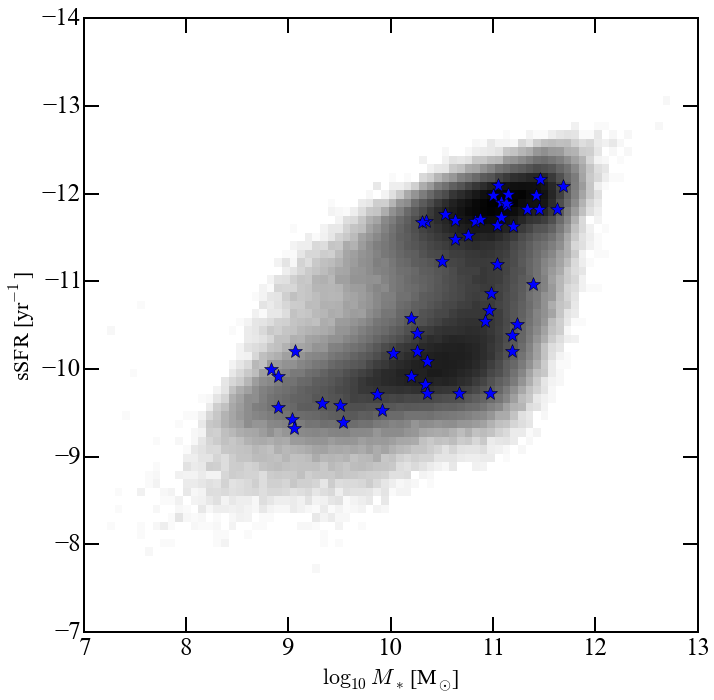

In [405]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
ax.hist2d(dr7_mass['MEDIAN'][idr7], dr7_ssfr['MEDIAN'][idr7], bins=80, cmin=3, cmap='Greys', norm=LogNorm())
#ax.plot(dr7_mass['MEDIAN'][iarche], np.log10(dr7_sfr['MEDIAN'][iarche]), '.')
#ax.plot(dr7_mass[1000:11000]['MEDIAN'], dr7_sfr[1000:11000]['MEDIAN'], '.')
ax.plot(mass[iarchetype], sfr[iarchetype]-mass[iarchetype], '*', ms=15)
ax.set_ylim(-7, -14)
ax.set_xlim(7, 13.)
ax.set_xlabel(r'$\log_{10}$ $M_*$ [M$_\odot$]', fontsize=22)
ax.set_ylabel(r'sSFR [yr$^{-1}$]', fontsize=22)
print(iarchetype.size)

[]

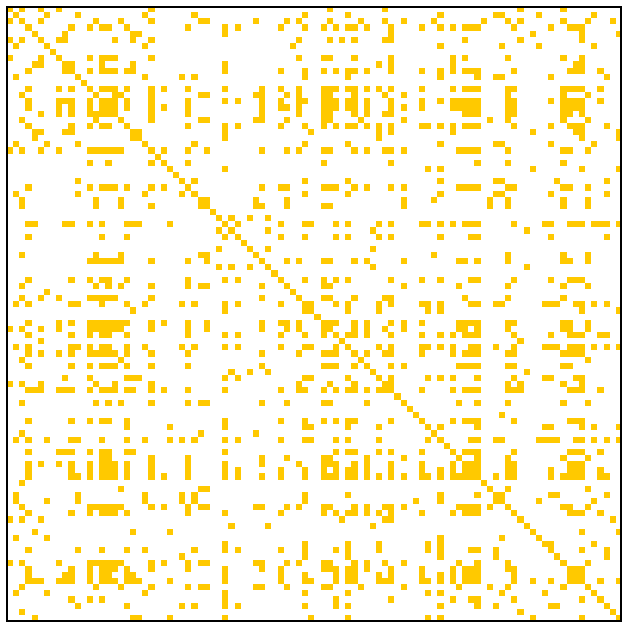

In [410]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
mat = ax.imshow(a_matrix[0:100, 0:100], cmap='hot_r', interpolation='nearest', vmax=3., vmin=0)
#plt.yticks(np.arange(a_school.shape[0]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.xticks(np.arange(a_school.shape[1]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.yticks(np.arange(a_matrix.shape[0]-1)+0.5, [])#+1)
#plt.xticks(np.arange(a_matrix.shape[1]-1)+0.5, [])#+1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
#plt.xticks(rotation=30)
#plt.xlabel('Concert Dates')

# this places 0 or 1 centered in the individual squares
#for x in np.arange(a_school.shape[0]):
#    for y in np.arange(a_school.shape[1]):
#        ax.annotate(str(a_school[x, y].astype(int))[0], xy=(y, x), 
#                    horizontalalignment='center', verticalalignment='center', fontsize=20)
#ax.grid(True)
#plt.show()

[]

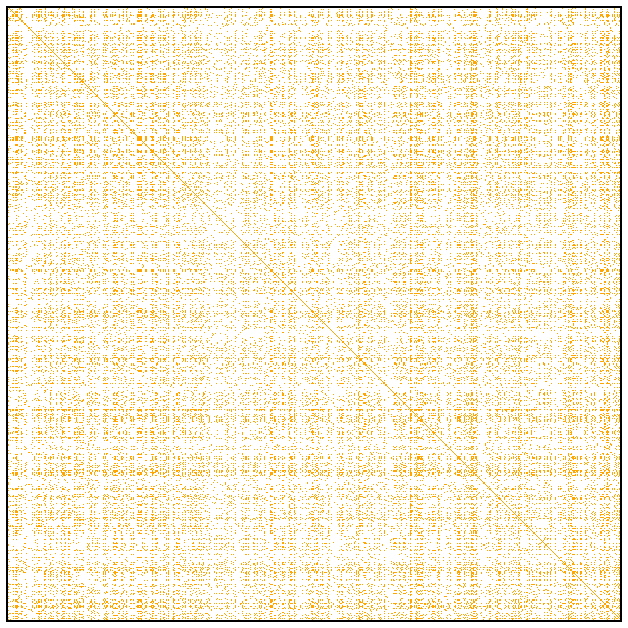

In [445]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
mat = ax.imshow(a_matrix, cmap='hot_r', interpolation='nearest', vmax=2.6, vmin=0)
#plt.yticks(np.arange(a_school.shape[0]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.xticks(np.arange(a_school.shape[1]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.yticks(np.arange(a_matrix.shape[0]-1)+0.5, [])#+1)
#plt.xticks(np.arange(a_matrix.shape[1]-1)+0.5, [])#+1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
#plt.xticks(rotation=30)
#plt.xlabel('Concert Dates')

# this places 0 or 1 centered in the individual squares
#for x in np.arange(a_school.shape[0]):
#    for y in np.arange(a_school.shape[1]):
#        ax.annotate(str(a_school[x, y].astype(int))[0], xy=(y, x), 
#                    horizontalalignment='center', verticalalignment='center', fontsize=20)
#ax.grid(True)
#plt.show()

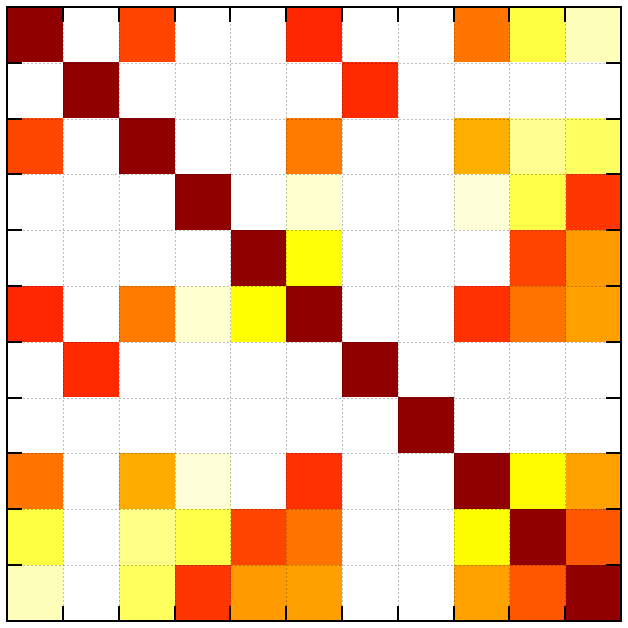

In [461]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
mat = ax.imshow(chi2[0:11, 0:11]/newwave.size, cmap='hot', interpolation='nearest', vmax=8., vmin=-2)
#plt.yticks(np.arange(a_school.shape[0]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.xticks(np.arange(a_school.shape[1]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
plt.yticks(np.arange(11-1)+0.5, [])#+1)
plt.xticks(np.arange(11-1)+0.5, [])#+1)
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.set_xticks([])
#ax.set_yticks([])
#plt.xticks(rotation=30)
#plt.xlabel('Concert Dates')

# this places 0 or 1 centered in the individual squares
#for x in np.arange(a_school.shape[0]):
#    for y in np.arange(a_school.shape[1]):
#        ax.annotate(str(a_school[x, y].astype(int))[0], xy=(y, x), 
#                    horizontalalignment='center', verticalalignment='center', fontsize=20)
ax.grid(True)
#plt.show()

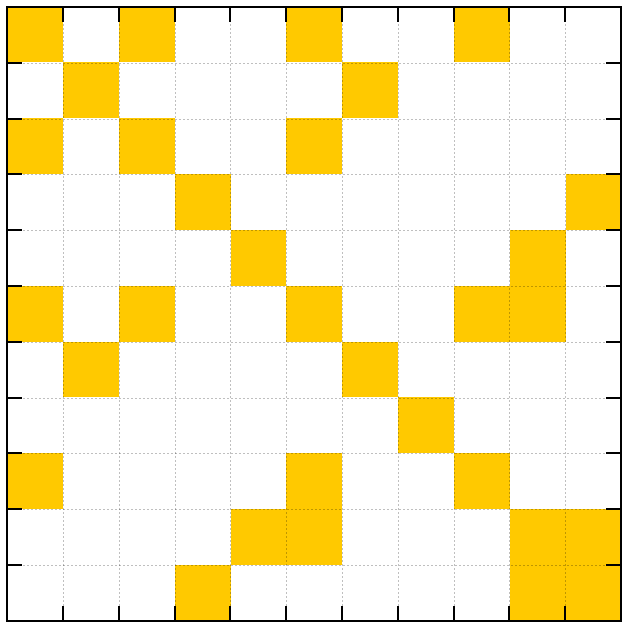

In [438]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)
mat = ax.imshow(a_matrix[0:11, 0:11], cmap='hot_r', interpolation='nearest', vmax=3., vmin=0)
#plt.yticks(np.arange(a_school.shape[0]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
#plt.xticks(np.arange(a_school.shape[1]-1)+0.5, np.arange(a_school.shape[0]-1)+1)#+1)
plt.yticks(np.arange(11-1)+0.5, [])#+1)
plt.xticks(np.arange(11-1)+0.5, [])#+1)
ax.set_xticklabels([])
ax.set_yticklabels([])
#ax.set_xticks([])
#ax.set_yticks([])
#plt.xticks(rotation=30)
#plt.xlabel('Concert Dates')

# this places 0 or 1 centered in the individual squares
#for x in np.arange(a_school.shape[0]):
#    for y in np.arange(a_school.shape[1]):
#        ax.annotate(str(a_school[x, y].astype(int))[0], xy=(y, x), 
#                    horizontalalignment='center', verticalalignment='center', fontsize=20)
ax.grid(True)
#plt.show()

[]

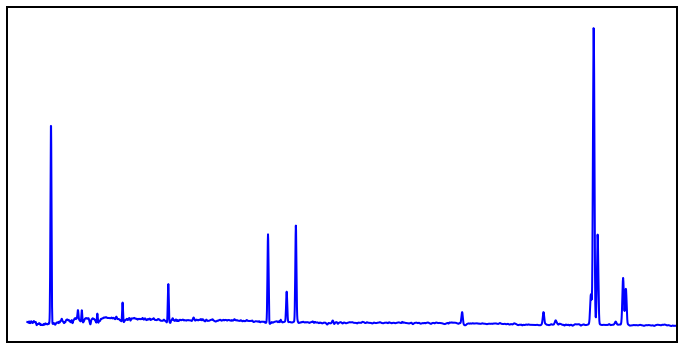

In [458]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x = tmpwave
iwave_use = np.where(tmpmedian[:,4]>1.E-5)[0]
y = cookb_signalsmooth.smooth(tmpmedian[iwave_use,4], 10)
ax.plot(x[iwave_use], y)
ax.set_xticks([])
ax.set_yticks([])

[]

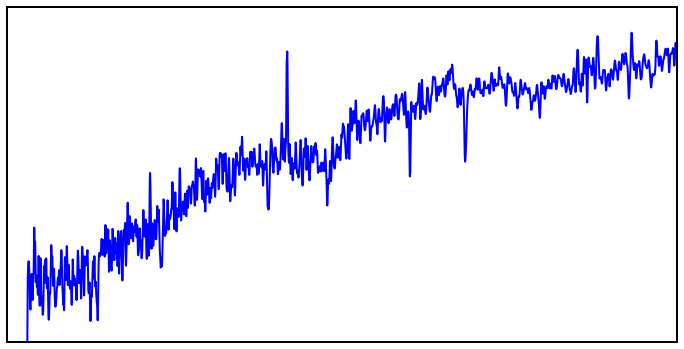

In [455]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x = tmpwave
iwave_use = np.where(tmpmedian[:,8]>1.E-5)[0]
y = cookb_signalsmooth.smooth(tmpmedian[iwave_use,8], 10)
ax.plot(x[iwave_use], y)
ax.set_xticks([])
ax.set_yticks([])

In [462]:
g_school = setcover.SetCover(a_school, cost_school)

In [467]:
g_school.CFT()

Best solution: UB=3.0, LB=2.997788310519269, UB1=3.0, LB1=2.997788310519269
3.0
UB=3.0, UB1=3.0, LB=2.997788310519269, change=0.07372298269103794%
Best solution: 3.0


In [468]:
np.nonzero(g_school.s)

(array([1, 3, 9]),)

In [470]:
print(a_school)

[[ True  True  True  True False False False False False False False]
 [ True  True  True False  True False False False False False False]
 [ True  True  True  True  True  True False False False False False]
 [ True False  True  True False  True  True False False False False]
 [False  True  True False  True  True False  True  True False False]
 [False False  True  True  True  True  True  True False False False]
 [False False False  True False  True  True  True False False False]
 [False False False False  True  True  True  True  True  True False]
 [False False False False  True False False  True  True  True False]
 [False False False False False False False  True  True  True  True]
 [False False False False False False False False False  True  True]]
